1. Sketch two different sine waves of different frequencies, and the wave you
would get by summing the two.

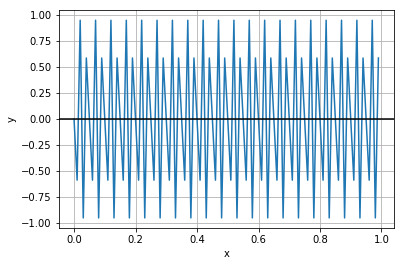

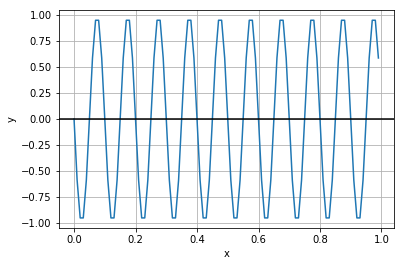

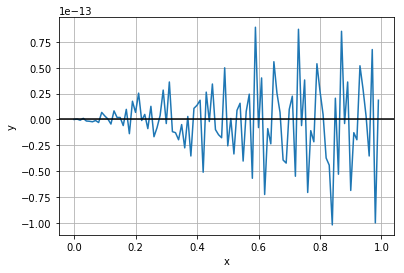

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plot

def plot_wave(A,f,phi,name='',color='g'):
    plot.clf()
    x = np.arange(0, 1, 0.01);
    y  = A*np.sin(2*np.pi*f*x + np.pi/180*phi)
    plot.plot(x,y)
    plot.xlabel('x')
    plot.ylabel('y')
    plot.title(name)
    plot.grid(True, which='both') 
    plot.axhline(y=0, color='k') 
    plot.show()
    
plot_wave(1,60,0)
plot_wave(1,90,0)#3:2
plot_wave(1,150,0)#I swear there's a third there

Write out the circuit diagram for the 4-qubit QFT using H, REV, and Rk 2. gates.

In [4]:
import math
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
qr = QuantumRegister(4)
cr = ClassicalRegister(4)
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0])
circuit.cu1(math.pi/2.,qr[1],qr[0])
circuit.cu1(math.pi/4.,qr[2],qr[0])
circuit.cu1(math.pi/8.,qr[3], qr[0])

circuit.h(qr[1])
circuit.cu1(math.pi/2.,qr[2],qr[1])
circuit.cu1(math.pi/4.,qr[3],qr[1])

circuit.h(qr[2])
circuit.cu1(math.pi/2.,qr[3],qr[2])

circuit.h(qr[3])
circuit.draw()
#circuit.rev(qr[0],qr[1],qr[2],qr[3])

#circuit.cu1(lambda,control,target)
#lambda = 2pi/2^k




Write out the circuit diagram for the 5-qubit QFT using H, REV, and Rk 3. gates.

In [10]:
import math
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
qr = QuantumRegister(5)
cr = ClassicalRegister(5)
circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0])
circuit.cu1(math.pi/2.,qr[1],qr[0])
circuit.cu1(math.pi/4.,qr[2],qr[0])
circuit.cu1(math.pi/8.,qr[3], qr[0])
circuit.cu1(math.pi/16.,qr[4], qr[0])

circuit.h(qr[1])
circuit.cu1(math.pi/2.,qr[2],qr[1])
circuit.cu1(math.pi/4.,qr[3],qr[1])
circuit.cu1(math.pi/8.,qr[4], qr[1])

circuit.h(qr[2])
circuit.cu1(math.pi/2.,qr[3],qr[2])
circuit.cu1(math.pi/4., qr[4], qr[3])


circuit.h(qr[3])
circuit.cu1(math.pi/2.,qr[4],qr[3])
circuit.h(qr[4])
#circuit.rev(qr[0],qr[1],qr[2],qr[3],qr[4])

circuit.draw()

4. Create a one qubit implementation for the QFT on the IBM QX Composer.

In [ ]:
"""OPENQASM 2.0;
include "qelib1.inc";

qreg q[1];
creg c[1];

h q[0];"""

5. Create a two qubit implementation for the QFT on the IBM QX Composer.

In [ ]:
"""
OPENQASM 2.0;
include "qelib1.inc";

qreg q[2];
creg c[2];

h q[0];
cu1(pi/2) q[1],q[0];
h q[1];"""

6. Advanced: Create a three qubit implementation for the QFT on the IBM QX Composer

In [ ]:
"""
OPENQASM 2.0;
include "qelib1.inc";

qreg q[3];
creg c[3];

h q[0];
cu1(pi/2) q[1],q[0];
cu1(pi/4) q[2],q[0];
h q[1];
cu1(pi/2) q[2],q[1];
h q[2];"""

7. Use the h and cu1 gates, available in Qiskit, to write a QFT function in Python
that takes as input a quantum circuit and quantum registers, along with a
number n that will perform a QFT on n qubits on the quantum register in the
circuit.

In [11]:
#NOTE: Provided in supplied code
def qft(qr,qc,n_qubits):
    # Get the circuit and the quantum register by name
    for i in range(n_qubits):
        for j in range(i):
            qc.cu1(math.pi/float(2**(i-j)), qr[i], qr[j])
        qc.h(qr[i])
